In [19]:
import os
import sys

import numpy as np
import pandas as pd

from IPython.display import Image

In [2]:
import QuantLib as ql

In [3]:
valuationDate = ql.Date(13,6,2022)
ql.Settings.instance().evaluationDate = valuationDate

calendar = ql.UnitedStates()
dayCount = ql.ActualActual()

In [4]:
# simple quote objects
underlying_qt = ql.SimpleQuote(3900)    # underlying price
dividend_qt = ql.SimpleQuote(0.0175)      # Dividend Yield
riskfreerate_qt = ql.SimpleQuote(0.02479)  # Risk-free Rate
volatility_qt = ql.SimpleQuote(0.25275)    # Volatility

In [5]:
# Quoto Handle Objects
u_qhd = ql.QuoteHandle(underlying_qt)
q_qhd = ql.QuoteHandle(dividend_qt)
r_qhd = ql.QuoteHandle(riskfreerate_qt)
v_qhd = ql.QuoteHandle(volatility_qt)

In [8]:
# Term Structure Objects
"""
Dividend yield, riskfree rate and volatility requires term structure across
These values change over time and thus requires detailed insturction
Dividend yield, riskfree rate --> FlatForward() : certain value at maturity 
Volatility --> BlackConstantVol() : 
"""
r_ts = ql.FlatForward(valuationDate, r_qhd, dayCount)
d_ts = ql.FlatForward(valuationDate, q_qhd, dayCount)
v_ts = ql.BlackConstantVol(valuationDate, calendar, v_qhd, dayCount)

In [9]:
# Term-Structure Handle Objects
r_thd = ql.YieldTermStructureHandle(r_ts)
d_thd = ql.YieldTermStructureHandle(d_ts)
v_thd = ql.BlackVolTermStructureHandle(v_ts)

In [10]:
# process and engine
process = ql.BlackScholesMertonProcess(u_qhd, d_thd, r_thd, v_thd)
engine = ql.AnalyticEuropeanEngine(process)

In [16]:
# option objects
option_type = ql.Option.Call
strike_price = 3900
expiry_date = ql.Date(30,12,2022)
exercise = ql.EuropeanExercise(expiry_date)
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
option = ql.VanillaOption(payoff, exercise)

In [17]:
# Pricing
option.setPricingEngine(engine)

In [18]:
# price and greek results
print("option premium = ", round(option.NPV(), 2))
print("option delta = ", round(option.delta(), 4))
print("option gamma = ", round(option.gamma(), 4))
print("option theta = ", round(option.thetaPerDay(), 4))
print("option vega = ",  round(option.vega() / 100, 4))
print("option rho = " ,  round(option.rho() / 100, 4))

option premium =  297.29
option delta =  0.5408
option gamma =  0.0005
option theta =  -0.7325
option vega =  11.414
option rho =  10.0765


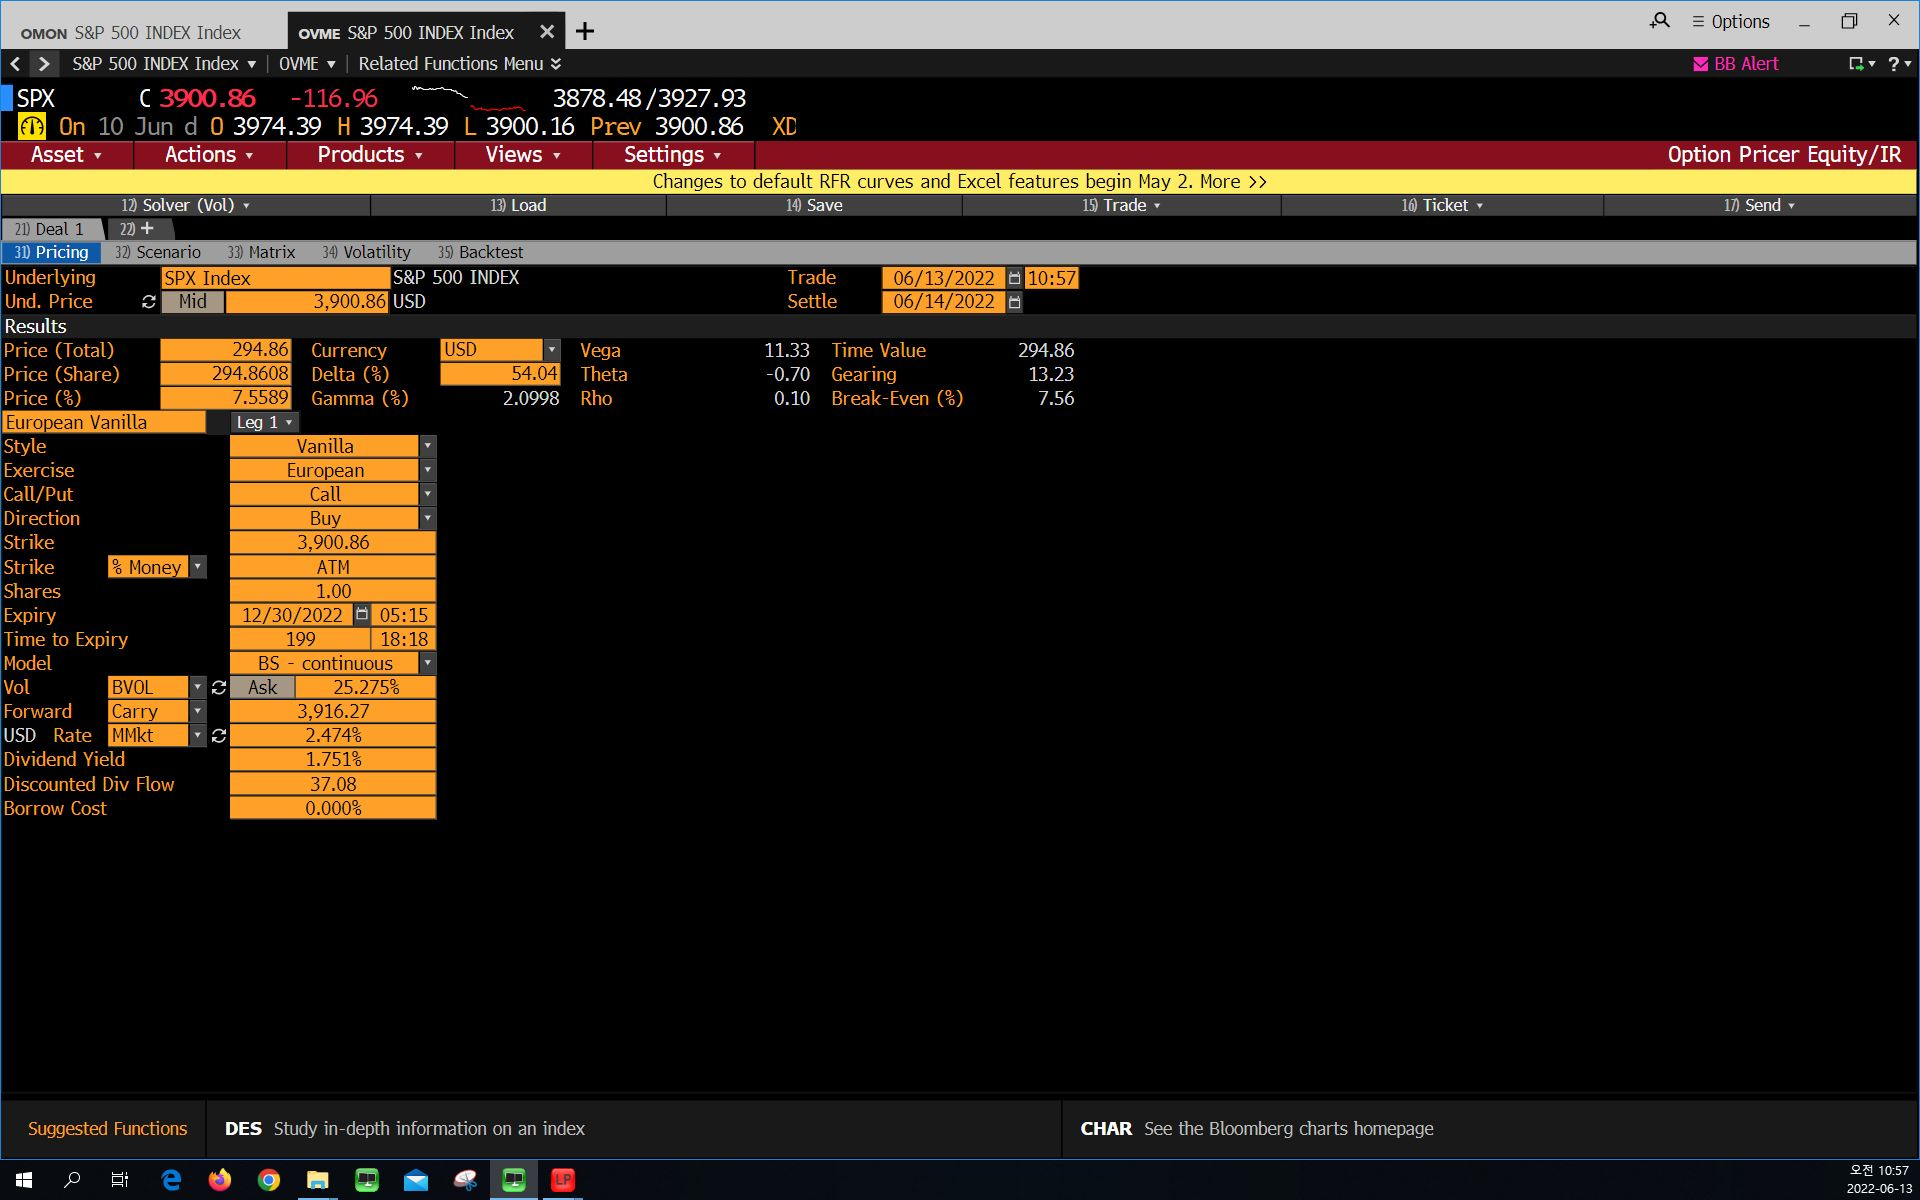

In [21]:
Image("qlib/2022-06-13/EUR_OVME_call.JPG")

In [22]:
# automatic re-pricing
underlying_qt.setValue(3749)

In [23]:
print("option premium = ", round(option.NPV(), 2))
print("option delta = ", round(option.delta(), 4))
print("option gamma = ", round(option.gamma(), 4))
print("option theta = ", round(option.thetaPerDay(), 4))
print("option vega = ",  round(option.vega() / 100, 4))
print("option rho = " ,  round(option.rho() / 100, 4))

option premium =  221.83
option delta =  0.4582
option gamma =  0.0006
option theta =  -0.7039
option vega =  10.9975
option rho =  8.3196


In [25]:
# calculating implied volatility from market price of option
mkt_price = 226.22
implied_volatility = option.impliedVolatility(mkt_price, process)
volatility_qt.setValue(implied_volatility)

In [26]:
print("option premium = ", round(option.NPV(), 2))
print("option delta = ", round(option.delta(), 4))
print("option gamma = ", round(option.gamma(), 4))
print("option theta = ", round(option.thetaPerDay(), 4))
print("option vega = ",  round(option.vega() / 100, 4))
print("option rho = " ,  round(option.rho() / 100, 4))

option premium =  226.21
option delta =  0.4599
option gamma =  0.0005
option theta =  -0.7148
option vega =  11.0019
option rho =  8.3313
